## **Robo-Advisor Simulation**

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Define questions and possible answers
questions = [
    "Answer 'a, b, c, d or e' for the following questions:\n"

    "\n1. What are your primary financial goals for these investments?\n"
    "a) Short-term goals (e.g., buying a car, vacation).\n"
    "b) Medium-term goals (e.g., buying a house, education).\n"
    "c) Long-term goals (e.g., retirement, generational wealth).",

    "\n2. How would you feel if your investments lost value in the short term?\n"
    "a) Very uncomfortable.\n"
    "b) Somewhat uncomfortable.\n"
    "c) Neutral.\n"
    "d) Somewhat comfortable.\n"
    "e) Very comfortable.",

    "\n3. Do you have a sufficient emergency fund to cover unexpected expenses?\n"
    "a) Yes, I have a substantial emergency fund.\n"
    "b) I have some savings but not enough for a major emergency.\n"
    "c) No, I don't have an emergency fund.",

    "\n4. How stable is your current source of income?\n"
    "a) Very stable (e.g., government job, tenured professor, senior management, etc.).\n"
    "b) Moderately stable (e.g., full-time job).\n"
    "c) Somewhat unstable (e.g., freelancing, contract work).\n"
    "d) Highly unstable (e.g., no consistent income).",

    "\n5.Are you willing to accept higher levels of risk for potentially higher returns?\n"
    "a) No, I prefer lower risk and lower returns.\n"
    "b) Yes, I'm willing to take some risks for potentially higher returns."
]

In [3]:
# Map answers to risk points for each question
risk_mappings = [
    {'a': 1, 'b': 2, 'c': 3}, # Question 1
    {'a': 1, 'b': 1.5, 'c': 2, 'd': 2.5, 'e': 3}, # Question 2
    {'a': 3, 'b': 2, 'c': 1}, # Question 3
    {'a': 2.5, 'b': 2, 'c': 1.5, 'd': 1}, # Question 4
    {'a': 1, 'b': 2} # Question 5
]

In [4]:
# Function to validate user input based on available choices
def get_valid_input(question, valid_choices):
    while True:
        answer = input(question).strip().lower()
        if answer in valid_choices:
            return answer
        else:
            print("\nInvalid input. Please choose from the provided options.")

In [5]:
# Sample portfolio recommendations
portfolios = {
    'low': {'stocks': 30, 'bonds': 65, 'gold': 5, 'real estate': 0, 'crypto': 0},
    'medium': {'stocks': 52.5, 'bonds': 35, 'gold': 5, 'real estate': 7.5, 'crypto': 0},
    'high': {'stocks': 70, 'bonds': 15, 'gold': 5, 'real estate': 7.5, 'crypto': 2.5},
}

In [6]:
def recommend_portfolio(risk_appetite):
  return portfolios.get(risk_appetite)

Answer 'a, b, c, d or e' for the following questions:

1. What are your primary financial goals for these investments?
a) Short-term goals (e.g., buying a car, vacation).
b) Medium-term goals (e.g., buying a house, education).
c) Long-term goals (e.g., retirement, generational wealth).a

2. How would you feel if your investments lost value in the short term?
a) Very uncomfortable.
b) Somewhat uncomfortable.
c) Neutral.
d) Somewhat comfortable.
e) Very comfortable.a

3. Do you have a sufficient emergency fund to cover unexpected expenses?
a) Yes, I have a substantial emergency fund.
b) I have some savings but not enough for a major emergency.
c) No, I don't have an emergency fund.a

4. How stable is your current source of income?
a) Very stable (e.g., government job, tenured professor, senior management, etc.).
b) Moderately stable (e.g., full-time job).
c) Somewhat unstable (e.g., freelancing, contract work).
d) Highly unstable (e.g., no consistent income).a

5.Are you willing to accep

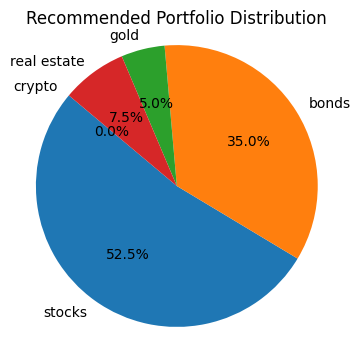

Are you satisfied with the recommendation? (yes/no): yes
Great! Happy investing.


In [8]:
# Function to plot portfolio recommendation as a pie chart
def plot_portfolio_recommendation(recommended_portfolio):
    labels = list(recommended_portfolio.keys())
    sizes = list(recommended_portfolio.values())

    print('\n')
    plt.figure(figsize=(4,4))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title('Recommended Portfolio Distribution')
    plt.show()

# Flag variable to control the main loop
exit_program = False

while not exit_program:
    risk_score = 0
    for i, question in enumerate(questions):
        answer = get_valid_input(question, list(risk_mappings[i].keys()))
        risk_score += risk_mappings[i][answer]

    # Categorize the user's risk appetite based on the score
    if risk_score >= 11:
        risk_appetite = 'high'
    elif risk_score >= 7:
        risk_appetite = 'medium'
    else:
        risk_appetite = 'low'

    # Fetch the recommended portfolio
    recommended_portfolio = recommend_portfolio(risk_appetite)

    if recommended_portfolio:
        print(f"\nBased on your risk appetite, we recommend the following portfolio:")
        for asset, allocation in recommended_portfolio.items():
            print(f"{asset}: {allocation}%")

        # Plot the portfolio recommendation as a pie chart
        plot_portfolio_recommendation(recommended_portfolio)

        # Ask if the user wants to continue or exit
        while True:
            feedback = input("Are you satisfied with the recommendation? (yes/no): ").strip().lower()
            if feedback == 'yes':
                print("Great! Happy investing.")
                exit_program = True  # Set the flag to exit the program
                break
            elif feedback == 'no':
                print("We're here to help. You can retake the risk assessment.")
                break
            else:
                print("Invalid feedback. Please provide 'yes' or 'no'.")
